<a href="https://colab.research.google.com/github/ehsanh123/Transfer-Learning/blob/main/Transfer_leraning_Functional_LSBU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer learning with Functional API

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import tensorflow as tf

In [3]:
from zipfile import ZipFile

In [2]:
# zip_ref=ZipFile('/content/drive/MyDrive/Research Data/Colab Notebooks/MSc 2023/Week 12/10_food_classes_10_percent.zip')
!git clone https://github.com/ehsanh123/files.git
# https://github.com/ehsanh123/Transfer_learning.git

Cloning into 'files'...
remote: Enumerating objects: 3277, done.
remote: Total 3277 (delta 0), reused 0 (delta 0), pack-reused 3277 (from 2)
Receiving objects: 100% (3277/3277), 160.03 MiB | 20.25 MiB/s, done.


In [4]:
# zip_ref.extractall()

In [3]:
test_dir='/content/files/train'
train_dir='/content/files/test'

We will use IDFD

IDG reminder NOW old


In [5]:
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_IDG= ImageDataGenerator(rescale=1/255.)   #note  255.
test_IDG = ImageDataGenerator(rescale=1/255.)

IMAGE_SHAPE=(224,224)
BATCH_SIZE=30

print("Training images:")
train_data_IDG = train_IDG.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data_IDG = test_IDG.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 2500 images belonging to 10 classes.
Testing images:
Found 750 images belonging to 10 classes.


In [7]:
test_data_IDG.class_indices

{'chicken_curry': 0,
 'chicken_wings': 1,
 'fried_rice': 2,
 'grilled_salmon': 3,
 'hamburger': 4,
 'ice_cream': 5,
 'pizza': 6,
 'ramen': 7,
 'steak': 8,
 'sushi': 9}

##IDFD
This is the MODERN way

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

In [14]:
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32

In [15]:
print("Training images:")
train_data_IDFD= image_dataset_from_directory(train_dir,
                                             label_mode='categorical',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SHAPE)

print("Testing images:")
test_data_IDFD=image_dataset_from_directory(test_dir,
                                            label_mode='categorical',
                                            batch_size=BATCH_SIZE,
                                            image_size=IMAGE_SHAPE)

Training images:
Found 2500 files belonging to 10 classes.
Testing images:
Found 750 files belonging to 10 classes.


In [11]:
test_data_IDFD.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
for images, labels in test_data_IDFD.take(1):  # Take one batch
    print("Labels for this batch:")
    print(labels.numpy())  # Convert Tensor to NumPy array for better visualization

Labels for this batch:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 

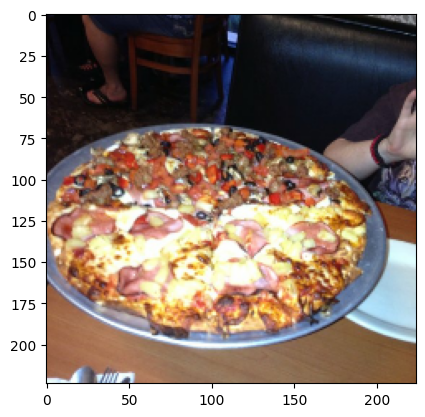

In [16]:
plt.imshow(np.array(images[0],dtype=np.int64).reshape((224, 224, 3)))


#Lets start with making our functional model

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [18]:
# Apply preprocessing using tf.keras Sequential API
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1.0 / 255),  # Scale pixel values to [0, 1]
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Random horizontal and vertical flips
    tf.keras.layers.RandomRotation(0.2),  # Rotate images randomly up to 20%
    tf.keras.layers.RandomZoom(0.2),  # Random zoom in/out by 20%
], name="data_augmentation")

Lets get the model we are going to transfer learn from

In [19]:
# Load the ResNet50 model without the top (fully connected) layers
trans_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the top classification layers
    weights='imagenet',  # Use ImageNet-pretrained weights
    input_shape=(224, 224, 3)  # Define the input shape if necessary
)

# Freeze the pre-trained layers so they do not update during training
trans_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [20]:
# Unfreeze the last few layers for fine-tuning
for layer in trans_model.layers[-10:]:  # Fine-tune the last 10 layers
    layer.trainable = True

In [21]:
input_shape=(224,224,3)

Building the first Functional Model, we call it model_1

In [22]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input shape
input_shape = (224, 224, 3)

# Input layer
inputs = layers.Input(shape=input_shape, name='Input')
print(f"Input shape: {inputs.shape}")

# Optional: Rescaling (normalize pixel values to [0, 1])
x = layers.Rescaling(1.0 / 255)(inputs)
print(f"After Rescaling: {x.shape}")

# First convolutional layer
x = layers.Conv2D(32, (3, 3), activation='relu', name='Conv_1')(x)
print(f"After Conv_1: {x.shape}")

# First pooling layer
x = layers.MaxPooling2D(pool_size=(2, 2), name='Pool_1')(x)
print(f"After Pool_1: {x.shape}")

# Second convolutional layer
x = layers.Conv2D(64, (3, 3), activation='relu', name='Conv_2')(x)
print(f"After Conv_2: {x.shape}")

# Second pooling layer
x = layers.MaxPooling2D(pool_size=(2, 2), name='Pool_2')(x)
print(f"After Pool_2: {x.shape}")

# Lets compare global pooling vs Flattening
#x = layers.Flatten(name='Flatten')(x)
x = layers.GlobalAveragePooling2D(name='Global_Avg_Pooling')(x)
print(f"After CHOICE Pooling: {x.shape}")

# Output layer (10 classes with softmax activation)
outputs = layers.Dense(10, activation='softmax', name='Output_Layer')(x)
print(f"After Output Layer: {outputs.shape}")

# Finalize the model
functional_model_1 = tf.keras.Model(inputs=inputs, outputs=outputs, name='Basic_Model')


Input shape: (None, 224, 224, 3)
After Rescaling: (None, 224, 224, 3)
After Conv_1: (None, 222, 222, 32)
After Pool_1: (None, 111, 111, 32)
After Conv_2: (None, 109, 109, 64)
After Pool_2: (None, 54, 54, 64)
After CHOICE Pooling: (None, 64)
After Output Layer: (None, 10)


In [23]:
input_shape = (224, 224, 3)

# Define the input layer
inputs = layers.Input(shape=input_shape, name='Input')
print(f"Input shape: {inputs.shape}")

# Optional: Rescaling (use this if the pre-trained model does not include rescaling)
x = layers.Rescaling(1.0 / 255, name='Rescaling')(inputs)
print(f"After Rescaling: {x.shape}")

# Attach the pre-trained transfer learning model (e.g., ResNet50)
x = trans_model(x, training=False)  # Set training=False to freeze pre-trained weights
print(f"After Transfer Learning Model: {x.shape}")

# Global Average Pooling to reduce dimensions and create a feature vector
x = layers.GlobalAveragePooling2D(name='Global_Avg_Pooling')(x)
print(f"After Global Average Pooling: {x.shape}")

# Add a custom dense layer for classification (output layer)
outputs = layers.Dense(10, activation='softmax', name='Output_Layer')(x)
print(f"After Output Layer: {outputs.shape}")

# Finalize the model
functional_model_trans = tf.keras.Model(inputs=inputs, outputs=outputs, name='Transfer_Learning_Model')

Input shape: (None, 224, 224, 3)
After Rescaling: (None, 224, 224, 3)
After Transfer Learning Model: (None, 7, 7, 2048)
After Global Average Pooling: (None, 2048)
After Output Layer: (None, 10)


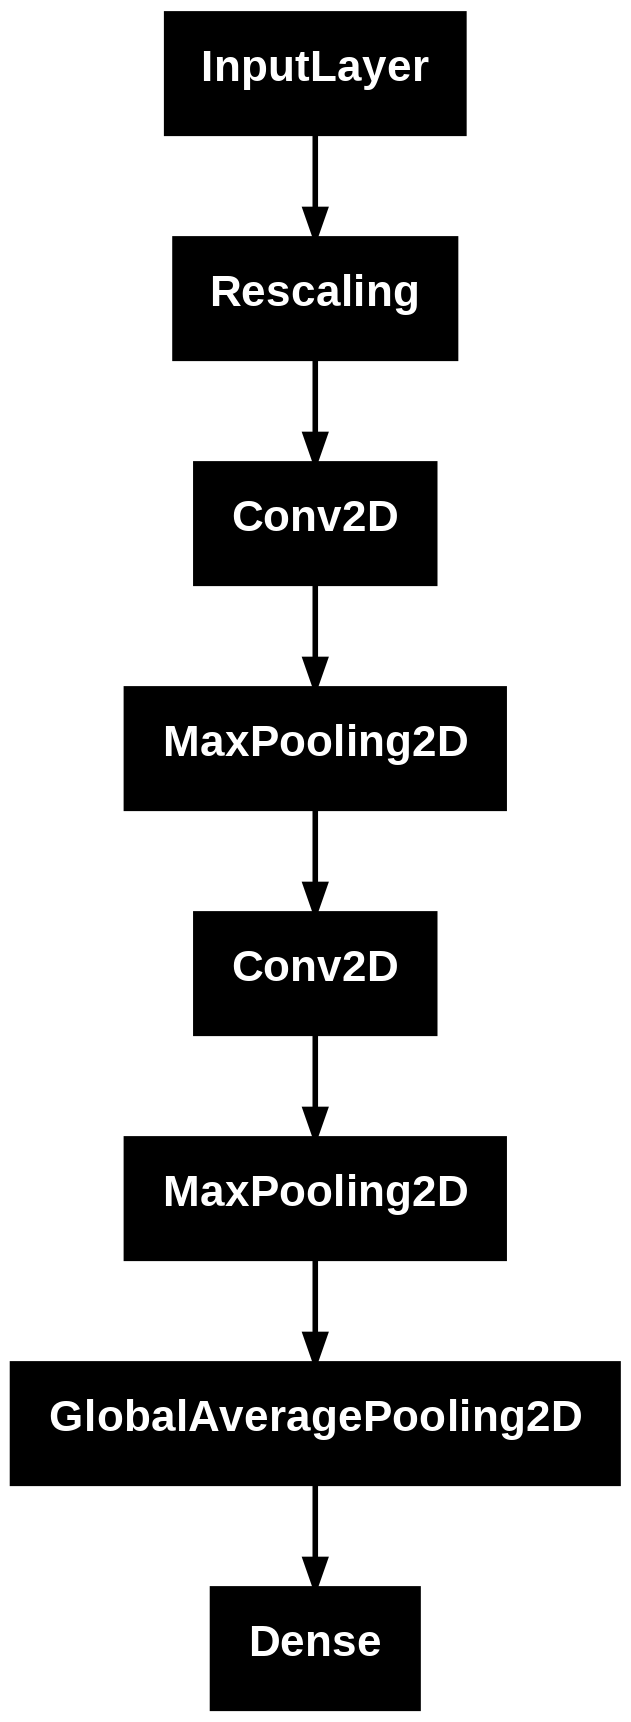

In [24]:
from keras.utils import plot_model
plot_model(functional_model_1)

In [25]:
plot_model(trans_model, expand_nested=True, to_file='trans_model_simple.pdf')

In [26]:
#from this point onward, everything is just similar to the sequential API
functional_model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [27]:
functional_model_trans.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [28]:
from datetime import datetime

In [29]:
t0=datetime.now()

history_1=functional_model_1.fit(train_data_IDFD,
            epochs=5,
            #steps_per_epoch=len(train_data_IDFD),
            validation_data=test_data_IDFD,)
            #validation_steps=len(test_data_IDFD),)

print(datetime.now())

t1=datetime.now()
print(t1-t0)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.1074 - loss: 2.3064 - val_accuracy: 0.1227 - val_loss: 2.2799
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.1312 - loss: 2.2622 - val_accuracy: 0.1427 - val_loss: 2.2403
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.1743 - loss: 2.2281 - val_accuracy: 0.1827 - val_loss: 2.2251
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.2094 - loss: 2.1739 - val_accuracy: 0.2133 - val_loss: 2.1828
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.2153 - loss: 2.1571 - val_accuracy: 0.1907 - val_loss: 2.1961
2025-04-16 15:37:29.702151
0:16:45.588699


In [ ]:
t0=datetime.now()

history_trans=functional_model_trans.fit(train_data_IDFD,
            epochs=3,
            #steps_per_epoch=len(train_data_IDFD),
            validation_data=test_data_IDFD,)
            #validation_steps=len(test_data_IDFD),)

print(datetime.now())

t1=datetime.now()
print(t1-t0)

Epoch 1/3
55/79 ━━━━━━━━━━━━━━━━━━━━ 2:21 6s/step - accuracy: 0.1311 - loss: 2.3889

The Model Checkpoint callback

Lets make a new check point to save the weights of our model when it is trained

In [ ]:
checkpoint_path='/content/my_model_chk.weights.h5' # make sure our create the file path before puting iut here

chk_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                save_best_only=False,
                                                save_freq='epoch')

filepath=checkpoint_path:

The path where the weights will be saved.
Example: model_4.ckpt will store the weights after each save.
save_weights_only=True:

Saves only the model's weights, not the entire model structure.
Use this when you want to load the model structure separately (useful for transfer learning or sharing pre-trained weights).
save_best_only=False:

If False, the weights are saved at the end of every epoch.
If True, the model saves weights only when it improves the monitored metric (e.g., validation loss).
save_freq='epoch':

Specifies when to save the weights.
'epoch': Saves at the end of each epoch.
Alternatively, you can set a specific number (e.g., save_freq=5 saves every 5 steps).

In [ ]:
t0=datetime.now()

history_ck=functional_model_trans.fit(train_data_IDFD,
            epochs=3,
            #steps_per_epoch=len(train_data_IDFD),
            validation_data=test_data_IDFD,
            #validation_steps=len(test_data_IDFD),
            callbacks=[chk_callback]) # we are adding our checkpoint here

print(datetime.now())

t1=datetime.now()
print(t1-t0)

In case your computer crashes, or for what ever reason, you need to start over.

In [ ]:
functional_model_trans.load_weights('/content/my_model_chk.weights.h5')
history_ck = functional_model_trans.fit(
    train_data_IDFD,
    epochs=5,  # Resume for more epochs
    validation_data=test_data_IDFD,
    callbacks=[chk_callback]
)

Now, Imagine , ytour friend in USA , is interested to repeat your work. and you want to only give him the weights, because the whole model is a large file... so he can build the model himself, and NOT train it, BUT , import your weights into her model

In [ ]:
# Save the weights to a file
functional_model_trans.save_weights('model_weights.weights.h5')
print("Weights saved to 'model_weights")

In [ ]:
#Your friends model, she will call it model 5

input = layers.Input(shape=input_shape, name='Input')  # Define the input layer

# Apply data augmentation
x = data_augmentation(input)

# Attach the pre-trained transfer learning model
x = trans_model(x, training=False)  # Freeze the pre-trained weights
print(f'After Transfer Learning Model: {x.shape}')

# Global Average Pooling to reduce dimensions
x = layers.GlobalAveragePooling2D(name='Global_Avg_Pooling')(x)
print(f'After Global Average Pooling: {x.shape}')

# Output layer for classification
output = layers.Dense(10, activation='softmax', name='Output_Layer')(x)

# Create your friend's model
friends_model = tf.keras.Model(inputs=input, outputs=output, name='Friends_Model')

# Compile the model
friends_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

Your friend is going to use your weights, by using the .load_weights() function

In [ ]:
# Load the weights into the friend's model
friends_model.load_weights('/content/model_weights.weights.h5')
print("Weights loaded successfully!")

Now, your friend can try and see if your model is rubbish or as good as you claim :)

In [ ]:
# Evaluate the model on the test data
loss, accuracy = friends_model.evaluate(test_data_IDFD, verbose=1)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4%}")

In [ ]:
720/32

And overall to make predictions......

In [ ]:
predictions = friends_model.predict(test_data_IDFD)

In [ ]:
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

And finally, if you want to test it with some image that has never been in your original data...  REAL testing I mean

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

# Load and preprocess the image
image_path = 'path_to_your_image.jpg'  # Replace with your image path
img = load_img(image_path, target_size=(224, 224))  # Resize image, deffinitly do this
img_array = img_to_array(img)  # Convert image to array
img_array = img_array / 255.0  # Normalize to [0, 1] range
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
prediction = friends_model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {test_data_IDFD.class_names[predicted_class[0]]}")

THATS it

Oh, in case you want to do More augmentation, using the Sequential Augmentation....we prepared:

In [ ]:
# Define the input shape
input_shape = (224, 224, 3)

# Input layer
inputs = layers.Input(shape=input_shape, name='Input')

# Apply data augmentation
x = data_augmentation(inputs)  # This is absically  Dynamically augment the data during training<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<                                 Here

# Attach the pre-trained transfer learning model
x = trans_model(x, training=False)  # Use the frozen pre-trained model
print(f"After Transfer Learning Model: {x.shape}")

# Global Average Pooling
x = layers.GlobalAveragePooling2D(name='Global_Avg_Pooling')(x)
print(f"After Global Average Pooling: {x.shape}")

# Output layer
outputs = layers.Dense(10, activation='softmax', name='Output_Layer')(x)

# Create the model
friends_model = tf.keras.Model(inputs=inputs, outputs=outputs, name='Friends_Model')

# Compile the model
friends_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Print the model summary
friends_model.summary()

Your mate saving the entire model

In [ ]:
friends_model.save('friends_model_with_optimizer.h5')

In [ ]:
from tensorflow.keras.models import load_model
friends_model = load_model('friends_model_with_optimizer.h5')